# 1. Introduction
### 1.1 Client Background and Problem Statement

### 1.2 Project Goal

# 2. Data Comprehension
### 2.1 Data Collection

### Data explanation
We started with exploring economic, and policy measures and found several that the team felt could give insights congruent to the needs of the client. Below is the indicator name defintion, and dataframe that we will read into the notebook for exploration and manipulation
#### Target Variables
1. **Gross Domestic Product per capita (df_gdp)**_*[$US/Capita]* - Monetary value of all of the good and services produced within a contries borders - seen as a key indicator of economic health
3. **Poverty Score (df_cpi)**_*[%Population]*

#### Features
Some of the measures below are united nation assessments **Country Policy and Institutional Assessment** which evaluate a country's policy and intitutional framework

- **CPIA - Business Regulatory Assessment (df_reg)**_*[Rating 1-6]* - A united nations rating that assesses how conducive a countries policies are for private sector development (e.g. Ease of operating a business, Regulatory framework, Property rights)
- **CPIA - Gender Equity (df_gender)**_*[Rating 1-6]* - rating that measures the extent to which a country's policies promote gender equity and empower women
- **CPIA - Social Inclusion (df_social)**_*[Rating 1-6]*
- **CPIA - Transparency Accountabilty and Corruption (df_tac)**_*[Rating 1-6]*
- **CPIA - Public Resource Equity (df_pre)**_*[Rating 1-6]*
- **Health expenditures (df_health)**_*[%US/GDP]*
- **Trade Exports (df_trade, df_pop)**_*[%US/Population]*
- **Trade Imports (df_trade, df_pop)**_*[%US/Population]*
- **Ease of Doing Business (df_edb)**_*[Rating 0-100]*
- **Income Distribution (df_inc2q, df_inc3q, df_inc4q, df_ind5q, df_incT10)**_*[%Population]*
- **Education expenditures (df_edu)**_*[$US/GDP]*
- **Secondary education enrollment (df_college)**_*[%Population]*

In [29]:
#Libraries for data collection, manipulation, and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
#### Target Variables
df_gdp = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/GDP_per_cap_PPP.csv')
df_pov = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Poverty_Pct_Pop.csv')

#### CPIA
df_edb = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Ease_Doing_Business.csv')
df_reg = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Business_Regulation.csv')
df_gender = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Gender_Equity.csv')
df_pre = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Public_Resource_Equity.csv')
df_social = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Social_Inclusion.csv')
df_tac = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Transparency_Accountability_Corruption.csv')

#### Government Expenditures
df_health = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Health_Spend.csv')
df_edu = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Education_Spend.csv')

####  Financial
df_trade = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Trade.csv')
df_inc2q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_2nd_quintile.csv')
df_inc3q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_3rd_quintile.csv')
df_inc4q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_4th_quintile.csv')
df_inc5q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_5th_quintile.csv')
df_incT10 = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_highest_10.csv')

#### Other
df_college = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/College_Enrollment.csv')
df_pop = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/population2.csv')


### 2.1 EDA - Exploratory Data Analysis and Cleaning

#### 2.1.a Data prep for Target variables

In [31]:
'''
I know that i want to end up with a master dataframe with a index ordered by country then year
and columns of the various features mentioned above along with the three target variables
on the end of the table
Therefore for every df i will work to that end by
1. take an initial look at the data
2. address any missing values  - decided to do this after merging
3. strip white spaces 
4. drop any columns and rows that does not contribute to the study
5. reorganize standardize feature, level names, etc to merge seamlessly with other dfs moving forward
'''
##############  GDP Dataframe
df_gdp = df_gdp[['Country or Area', 'Year', 'Value']]  ########## Dropped a footnote column
df_gdp = df_gdp.applymap(lambda x: x.strip() if isinstance(x, str) else x)  ######### clean white space for all cells in table
df_gdp.columns = df_gdp.columns.str.strip()   ########## strip whitespace for the columns
df_gdp = df_gdp.rename(columns=str.lower) ######## make columns all lower case
df_gdp = df_gdp.rename(columns={'country or area': 'area', 'value': 'gdp'})    ############ change names to accomodate standardization moving forward
df_gdp['gdp'] = df_gdp['gdp'].round(2)  ################## round to two decimals
df_gdp['area'] = df_gdp['area'].astype(str)
#df_gdp

In [32]:
################ Repeat data prep for poverty measure
'''
df_pov has a makeup similar to df_gdp but it has footer that are not needed
starting below row 1011. i will also needed to get rid of footnotes column
'''
df_pov = df_pov.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_pov.columns = df_pov.columns.str.strip()
df_pov = df_pov[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_pov = df_pov.rename(columns={'Country or Area': 'Area', 'Value': '%pov'}) ############## rename for std
df_pov = df_pov.rename(columns=str.lower)   ############# make all lower case for std
df_pov = df_pov.iloc[:1012, :]  ################## get rid of the footer
df_pov['year'] = df_pov['year'].astype(int)
#df_pov

#### Data prep for UN Assessment related Feature variables

In [33]:
############### Repeat data prep for CPIA variables
''' CPIA_BUSINESS REGULATION'''
df_reg = df_reg.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_reg.columns = df_reg.columns.str.strip()
df_reg = df_reg[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_reg = df_reg.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_regulation'}) ############## rename for std
df_reg = df_reg.rename(columns=str.lower)   ############# make all lower case for std
#df_reg

''' CPIA_GENDER EQUITY'''
df_gender = df_gender.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_gender.columns = df_gender.columns.str.strip()
df_gender = df_gender[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_gender = df_gender.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_gender'}) ############## rename for std
df_gender = df_gender.rename(columns=str.lower)   ############# make all lower case for std
#df_gender

''' CPIA_PUBLIC RESOURCE EQUITY'''
df_pre = df_pre.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_pre.columns = df_pre.columns.str.strip()
df_pre = df_pre[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_pre = df_pre.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_resources'}) ############## rename for std
df_pre = df_pre.rename(columns=str.lower)   ############# make all lower case for std
#df_pre

''' CPIA_TRANSPARENCY ACCOUNTABILITY AND CORRUPTON'''
df_tac = df_tac.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_tac.columns = df_tac.columns.str.strip()
df_tac = df_tac[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_tac = df_tac.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_transparency'}) ############## rename for std
df_tac = df_tac.rename(columns=str.lower)   ############# make all lower case for std
#df_tac

''' CPIA_SOCIAL INCLUSION'''
df_social = df_social.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_social.columns = df_social.columns.str.strip()
df_social = df_social[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_social = df_social.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_inclusion'}) ############## rename for std
df_social = df_social.rename(columns=str.lower)   ############# make all lower case for std
#df_social


#### Data prep for Feature variables Healthcare, Education, and Business Ease

In [34]:
############## repeat data prep for ease of doing business along with govenmental expenditure variables
''' EASE OF DOING BUSINESS '''
df_edb = df_edb.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_edb.columns = df_edb.columns.str.strip()
df_edb = df_edb[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_edb = df_edb.rename(columns={'Country or Area': 'Area', 'Value': 'business_ease'}) ############## rename for std
df_edb = df_edb.rename(columns=str.lower)   ############# make all lower case for std
#df_edb

''' GOVERNMENT EXPENDITURES FOR HEALTHCARE '''
df_health.columns = df_health.iloc[0]           ########## resets the column to be the first row
df_health = df_health[1:].reset_index(drop=True)  
df_health = df_health.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_health.columns = df_health.columns.str.strip()
df_health.columns.values[1] = 'area'  ########## replace a NaN with area
df_health = df_health[df_health['Series'].str.startswith('Current')].reset_index(drop=True)
df_health = df_health[['area', 'Year', 'Value']]  ########### drop footnote
df_health = df_health.rename(columns={'Value': 'healthcare$'}) ############## rename for std
df_health = df_health.rename(columns=str.lower)   ############# make all lower case for std
df_health['year'] = df_health['year'].astype(int)
df_health['healthcare$'] = df_health['healthcare$'].astype(float)
#df_health

''' GOVERNMENT EXPENDITURES FOR EDUCATION - different column names than other dfs'''
df_edu = df_edu.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_edu.columns = df_edu.columns.str.strip()
df_edu = df_edu[['Reference Area', 'Time Period', 'Observation Value']]  ########### drop footnote
df_edu = df_edu.rename(columns={'Reference Area': 'Area', 'Time Period': 'Year', 'Observation Value': 'education$'}) ############## rename for std
df_edu = df_edu.rename(columns=str.lower)   ############# make all lower case for std
#df_edu

''' College Enrollment - was setup similar to df_edu'''
df_college = df_college.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_college.columns = df_college.columns.str.strip()
df_college = df_college[df_college['Sex'].str.startswith('All')].reset_index(drop=True)
df_college = df_college[['Reference Area', 'Time Period', 'Observation Value']]  ########### drop footnote
df_college = df_college.rename(columns={'Reference Area': 'Area', 'Time Period': 'Year', 'Observation Value': 'coll_enrollment'}) ############## rename for std
df_college = df_college.rename(columns=str.lower)   ############# make all lower case for std
#df_college


#### Data prep for Income related Feature variables

In [35]:
########################### repeat data prep for income distribution
''' 2ND QUINTILE OF INCOME DISTRIBUTION'''
df_inc2q = df_inc2q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_inc2q.columns = df_inc2q.columns.str.strip()
df_inc2q = df_inc2q[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_inc2q = df_inc2q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile2'}) ############## rename for std
df_inc2q = df_inc2q.rename(columns=str.lower)   ############# make all lower case for std
df_inc2q = df_inc2q.iloc[:2007, :] ################## get rid of footer
#df_inc2q

''' 3RD QUINTILE OF INCOME DISTRIBUTION'''
df_inc3q = df_inc3q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_inc3q.columns = df_inc3q.columns.str.strip()
df_inc3q = df_inc3q[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_inc3q = df_inc3q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile3'}) ############## rename for std
df_inc3q = df_inc3q.rename(columns=str.lower)   ############# make all lower case for std
df_inc3q = df_inc3q.iloc[:2007, :] ################## get rid of footer
#df_inc3q

''' 4TH QUINTILE OF INCOME DISTRIBUTION'''
df_inc4q = df_inc4q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_inc4q.columns = df_inc4q.columns.str.strip()
df_inc4q = df_inc4q[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_inc4q = df_inc4q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile4'}) ############## rename for std
df_inc4q = df_inc4q.rename(columns=str.lower)   ############# make all lower case for std
df_inc4q = df_inc4q.iloc[:2007, :] ################## get rid of footer
#df_inc4q

''' 5TH QUINTILE OF INCOME DISTRIBUTION'''
df_inc5q = df_inc5q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_inc5q.columns = df_inc5q.columns.str.strip()
df_inc5q = df_inc5q[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_inc5q = df_inc5q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile5'}) ############## rename for std
df_inc5q = df_inc5q.rename(columns=str.lower)   ############# make all lower case for std
df_inc5q = df_inc5q.iloc[:2007, :] ################## get rid of footer
#df_inc5q

''' TOP 10 PERCENT OF INCOME DISTRIBUTION'''
df_incT10 = df_incT10.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_incT10.columns = df_incT10.columns.str.strip()
df_incT10 = df_incT10[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_incT10 = df_incT10.rename(columns={'Country or Area': 'Area', 'Value': 'income_top10%'}) ############## rename for std
df_incT10 = df_incT10.rename(columns=str.lower)   ############# make all lower case for std
df_incT10 = df_incT10.iloc[:2007, :] ################## get rid of footer
#df_incT10

''' MERGE ALL OF THE SEPERATE INCOME DFS INTO ONE DF'''
df_income = pd.merge(df_inc2q, df_inc3q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_inc4q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_inc5q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_incT10, on=['area', 'year'], how='inner')

''' CREATE A NEW COLUMN FOR THE MIDDLE 60% AND DIFFERANCE BETWEEN TOP10% AND MIDDLE 60% '''
df_income['income_middle60%'] = df_income['income_quintile2'] + df_income['income_quintile3'] + df_income['income_quintile4']  ########### this is attempting to approximate the  size of middle class
df_income['income_difference_top-mid60'] = df_income['income_top10%'] - df_income['income_middle60%']   ###################### this is attempting to approximate this gap between the most wealthy and middle
df_income['year'] = df_income['year'].astype(int)
#df_income

#### Data prep for Trade related Feature variables

In [36]:
'''   CREATE A POPULATION TABLE TO LATER CALCULATE TRADE VALUES PER CAPITA'''
################# configure population by area, year, poplulation congruent to other dfs
df_pop.columns = df_pop.iloc[3]            ################# assign header and reslice appropriate area
df_pop = df_pop[4:].reset_index(drop=True)
df_pop = df_pop.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])   ################## Drop unneeded columns
df_pop2 = df_pop.melt(id_vars=['Country Name'], var_name='year', value_name='population')  ################ Use melt function to stack year and pop along side area
df_pop2['year'] = df_pop2['year'].astype(int)   
df_pop2 = df_pop2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_pop2 = df_pop2.rename(columns={'Country Name': 'area'})
df_pop2['population'] = df_pop2['population'] / 1000000   ################### align unit of measure to later create accurate import/ exports per capita
#df_pop2

'''  CREATE IMPORT AND EXPORT DFS'''
df_trade.columns = df_trade.iloc[0]   ################# assign header and reslice appropriate area
df_trade = df_trade[1:].reset_index(drop=True)
df_trade.columns.values[1] ='area'
df_trade = df_trade[['area', 'Year', 'Series', 'Value']]   ########### drop unneeded columns

######### IMPORTS
df_imports = df_trade[df_trade['Series'].str.contains(r'Imports CIF', na=False, regex=True)]  ############## pull out import related rows for import df
df_imports = df_imports.rename(columns={'Value': 'import$'})
df_imports = df_imports.rename(columns=str.lower)
df_imports = df_imports.drop(columns=['series'])
df_imports['import$'] = df_imports['import$'].str.replace(',', '').astype(float)   ########### get rid of commas to make astype float
df_imports['year'] = df_imports['year'].astype(int)

######## EXPORTS
df_exports = df_trade[df_trade['Series'].str.contains(r'Exports FOB', na=False, regex=True)] ############### pull out export related rows for export df
df_exports = df_exports.rename(columns={'Value': 'export$'})
df_exports = df_exports.rename(columns=str.lower)
df_exports = df_exports.drop(columns=['series'])
df_exports['export$'] = df_exports['export$'].str.replace(',', '').astype(float)
df_exports['year'] = df_exports['year'].astype(int)

''' MERGE TRADE DFS WITH POPULATION TO CREATE A TRADE PER CAPITA DF'''
df_trade2 = pd.merge(df_imports, df_exports, on=['area', 'year'], how='inner')
df_trade2 = pd.merge(df_trade2, df_pop2, on=['area', 'year'], how='inner')

df_trade2['import_capita'] = df_trade2['import$'] / df_trade2['population']   ################ create a column for import export per capita
df_trade2['export_capita'] = df_trade2['export$'] / df_trade2['population']

df_trade2 = df_trade2[['area', 'year', 'import_capita', 'export_capita']]      ############ drop unneeded columns
#df_trade2

#### Decisions about variables to include/discard

In [37]:
'''
Differnences in area names accross the different dataframes were observered. Also,
there are names of regions that comprise of countries listed seperately which is a redundancy.
A comparision of areas across all study variables is needed to determine which area names
to keep for the study
'''
########### create a unique set of coutry/areas for each df
areas_reg = df_reg[['area']].rename(columns={'area':'reg'}).drop_duplicates()  
areas_gen = df_gender[['area']].rename(columns={'area':'gen'}).drop_duplicates()
areas_pre = df_pre[['area']].rename(columns={'area':'pre'}).drop_duplicates()
areas_tac = df_tac[['area']].rename(columns={'area':'tac'}).drop_duplicates()
areas_soc = df_social[['area']].rename(columns={'area':'soc'}).drop_duplicates()
areas_hea = df_health[['area']].rename(columns={'area': 'hea'}).drop_duplicates()
areas_edu = df_edu[['area']].rename(columns={'area': 'edu'}).drop_duplicates()
areas_col = df_college[['area']].rename(columns={'area': 'col'}).drop_duplicates()
areas_inc = df_income[['area']].rename(columns={'area': 'inc'}).drop_duplicates()
areas_tra = df_trade2[['area']].rename(columns={'area': 'tra'}).drop_duplicates()
areas_gdp = df_gdp[['area']].rename(columns={'area':'gdp'}).drop_duplicates()
areas_pov = df_pov[['area']].rename(columns={'area':'pov'}).drop_duplicates()

########## create a master list of all unique areas
all_areas = pd.DataFrame({'area': pd.concat([areas_reg['reg'], areas_gen['gen'], areas_pre['pre'], \
                                            areas_tac['tac'], areas_soc['soc'], areas_hea['hea'], \
                                            areas_edu['edu'], areas_col['col'], areas_inc['inc'], \
                                            areas_tra['tra'], areas_gdp['gdp'], areas_pov['pov']]).drop_duplicates()})

########### merge all areas with each df alligned
compare_areas = all_areas \
.merge(areas_reg, left_on='area', right_on='reg', how='left') \
.merge(areas_gen, left_on='area', right_on='gen', how='left') \
.merge(areas_pre, left_on='area', right_on='pre', how='left') \
.merge(areas_tac, left_on='area', right_on='tac', how='left') \
.merge(areas_soc, left_on='area', right_on='soc', how='left') \
.merge(areas_hea, left_on='area', right_on='hea', how='left') \
.merge(areas_edu, left_on='area', right_on='edu', how='left') \
.merge(areas_col, left_on='area', right_on='col', how='left') \
.merge(areas_inc, left_on='area', right_on='inc', how='left') \
.merge(areas_tra, left_on='area', right_on='tra', how='left') \
.merge(areas_gdp, left_on='area', right_on='gdp', how='left') \
.merge(areas_pov, left_on='area', right_on='pov', how='left')

########## get rid of the 'areas' column
compare_areas = compare_areas[['reg', 'gen', 'pre', 'tac', 'soc','hea', 'edu', 'col', 'inc', 'tra','gdp', 'pov']]

########## create a column which captures ea rows unique string(area name)
compare_areas['unique_name'] = compare_areas.apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
######### save to csv for review
#compare_areas.to_csv('compare_areas.csv', index=False)

#### Remove Duplicates

In [38]:
import re

########### Create the re search criteria to find then remove duplicate names
regex_dict = {
    r'^Bolivia': 'Bolivia',
    r'^C.*voire$':'Ivory Coast',
    r'^Czech': 'Czech Republic',
    r'^Dem.*ongo$': 'D.R. Congo',
    r'Hong\sKong': 'Hong Kong',
    r'Iran': 'Iran',
    r'Korea': 'Korea',
    r'Lao\sP': 'Lao',
    r'^Libya': 'Libya',
    r'^Macao': 'Macao',
    r'Micronesia': 'Micronesia',
    r'Netherlands': 'Netherlands',
    r'Russia': 'Russia',
    r'^T.*iye$|Turkey': 'Turkiye',
    r'^Tanzania': 'Tanzania',
    r'United\sKingdom': 'United Kingdom',
    r'United\sStates': 'United States',
    r'Venezuela': 'Venezuela',
    r'^S.*Principe$': 'Sao Tome and Principe',
    r'^Kyrgyz': 'Kyrgyzstan',
    r'Gambia': 'Gambia'
}

#Function to standardize names
def standardize_country(name, regex_dict):
    for pattern, standard_name in regex_dict.items():
        if re.match(pattern, name):
            return standard_name
    return name


##############  update the names with the function (confirmed it was working with df['area2'] before rolling to all dfs)
df_reg['area'] = df_reg['area'].apply(lambda x: standardize_country(x, regex_dict))
df_gender['area'] = df_gender['area'].apply(lambda x: standardize_country(x, regex_dict))
df_pre['area'] = df_pre['area'].apply(lambda x: standardize_country(x, regex_dict))
df_tac['area'] = df_tac['area'].apply(lambda x: standardize_country(x, regex_dict))
df_social['area'] = df_social['area'].apply(lambda x: standardize_country(x, regex_dict))
df_health['area'] = df_health['area'].apply(lambda x: standardize_country(x, regex_dict))
df_edu['area'] = df_edu['area'].apply(lambda x: standardize_country(x, regex_dict))
df_college['area'] = df_college['area'].apply(lambda x: standardize_country(x, regex_dict))
df_income['area'] = df_income['area'].apply(lambda x: standardize_country(x, regex_dict))
df_trade2['area'] = df_trade2['area'].apply(lambda x: standardize_country(x, regex_dict))
df_gdp['area'] = df_gdp['area'].apply(lambda x: standardize_country(x, regex_dict))
df_pov['area'] = df_pov['area'].apply(lambda x: standardize_country(x, regex_dict))

##### Repeat the same code previously to confirm the changes you made worked

In [39]:
'''
Differnences in area names accross the different dataframes were observered. Also,
there are names of regions that comprise of countries listed seperately which is a redundancy.
A comparision of areas across all study variables is needed to determine which area names
to keep for the study
'''
########### create a unique set of coutry/areas for each df
areas_reg = df_reg[['area']].rename(columns={'area':'reg'}).drop_duplicates()  
areas_gen = df_gender[['area']].rename(columns={'area':'gen'}).drop_duplicates()
areas_pre = df_pre[['area']].rename(columns={'area':'pre'}).drop_duplicates()
areas_tac = df_tac[['area']].rename(columns={'area':'tac'}).drop_duplicates()
areas_soc = df_social[['area']].rename(columns={'area':'soc'}).drop_duplicates()
areas_hea = df_health[['area']].rename(columns={'area': 'hea'}).drop_duplicates()
areas_edu = df_edu[['area']].rename(columns={'area': 'edu'}).drop_duplicates()
areas_col = df_college[['area']].rename(columns={'area': 'col'}).drop_duplicates()
areas_inc = df_income[['area']].rename(columns={'area': 'inc'}).drop_duplicates()
areas_tra = df_trade2[['area']].rename(columns={'area': 'tra'}).drop_duplicates()
areas_gdp = df_gdp[['area']].rename(columns={'area':'gdp'}).drop_duplicates()
areas_pov = df_pov[['area']].rename(columns={'area':'pov'}).drop_duplicates()

########## create a master list of all unique areas
all_areas = pd.DataFrame({'area': pd.concat([areas_reg['reg'], areas_gen['gen'], areas_pre['pre'], \
                                            areas_tac['tac'], areas_soc['soc'], areas_hea['hea'], \
                                            areas_edu['edu'], areas_col['col'], areas_inc['inc'], \
                                            areas_tra['tra'], areas_gdp['gdp'], areas_pov['pov']]).drop_duplicates()})

########### merge all areas with each df alligned
compare_areas2 = all_areas \
.merge(areas_reg, left_on='area', right_on='reg', how='left') \
.merge(areas_gen, left_on='area', right_on='gen', how='left') \
.merge(areas_pre, left_on='area', right_on='pre', how='left') \
.merge(areas_tac, left_on='area', right_on='tac', how='left') \
.merge(areas_soc, left_on='area', right_on='soc', how='left') \
.merge(areas_hea, left_on='area', right_on='hea', how='left') \
.merge(areas_edu, left_on='area', right_on='edu', how='left') \
.merge(areas_col, left_on='area', right_on='col', how='left') \
.merge(areas_inc, left_on='area', right_on='inc', how='left') \
.merge(areas_tra, left_on='area', right_on='tra', how='left') \
.merge(areas_gdp, left_on='area', right_on='gdp', how='left') \
.merge(areas_pov, left_on='area', right_on='pov', how='left')

########## get rid of the 'areas' column
compare_areas2 = compare_areas2[['reg', 'gen', 'pre', 'tac', 'soc','hea', 'edu', 'col', 'inc', 'tra','gdp', 'pov']]

########## create a column which captures ea rows unique string(area name)
compare_areas2['unique_name'] = compare_areas2.apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
######### save to csv for review
compare_areas2.to_csv('compare_areas2.csv', index=False)

In [40]:
################ Merge all of the dfs
'''
the df_gdp is the most significant df, since im not interested in any feature that 
does not measure gdp also df_gdp happens to have the widest range in years in 
which i will later truncate. based on this i will merge all other dfs to gdp
'''
df_economy = pd.merge(df_gdp, df_pov, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_reg, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_gender, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_pre, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_tac, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_social, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_health, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_edu, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_college, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_income, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_trade2, on=['area', 'year'], how='left')

df_economy = df_economy.sort_values(by=['area', 'year']).reset_index(drop=True)

############### Remove sparse years from dataset
'''
I reviewed each dataset against the years in which data was being collected
again giving priority to gdp since that is the primary target variable. The years
between 2000 and 2020 give the dataset the densest table vs the feature variables
fig is attached
'''
df_economy = df_economy[df_economy['year'].between(2000, 2022)].reset_index(drop=True)

df_economy.to_csv('df_economy.csv', index=False)

### 2.2 Graphic Analysis and Data Transformation

#### 2.2a Target Variables Graphical Review

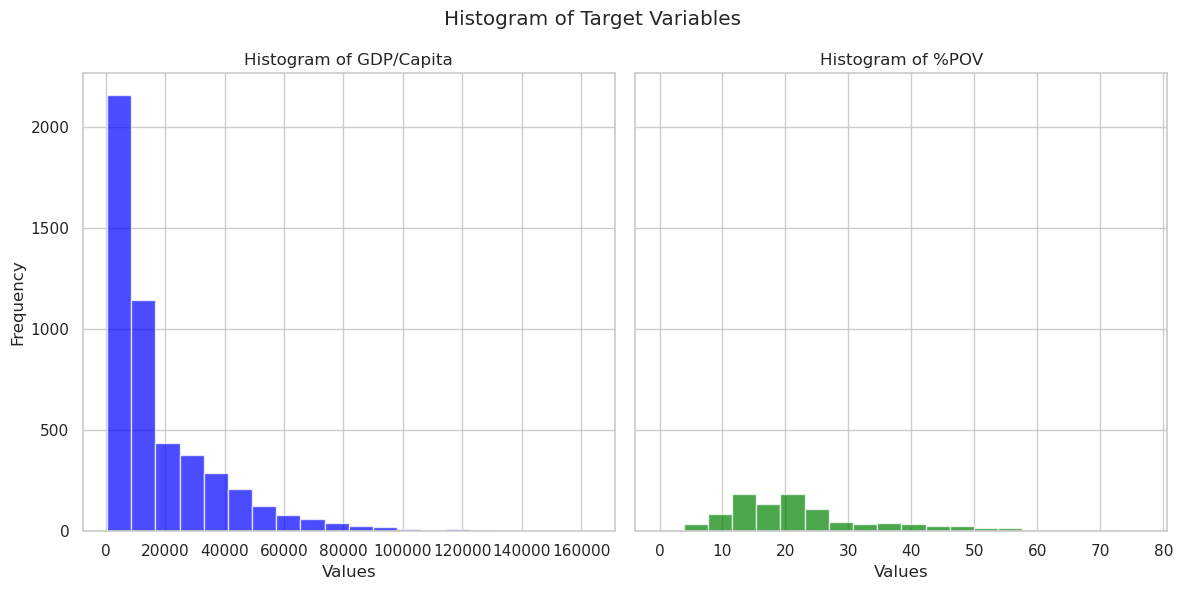

In [41]:
df_economy2 = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/df_economy2.csv')

import seaborn as sns
import matplotlib.pyplot as plt

###### create a figure and axis objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

####### plot histogram for GDP
ax[0].hist(df_economy2['gdp'], bins=20, color='blue', alpha=0.7)
ax[0].set_title(f'Histogram of GDP/Capita')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

####### plot histogram for %POV
ax[1].hist(df_economy2['%pov'], bins=20, color='green', alpha=0.7)
ax[1].set_title(f'Histogram of %POV')
ax[1].set_xlabel('Values')

fig.suptitle('Histogram of Target Variables')

plt.tight_layout()
plt.show()

#### 2.2b Graphical Review of Feature Variables (CPIA Variables)

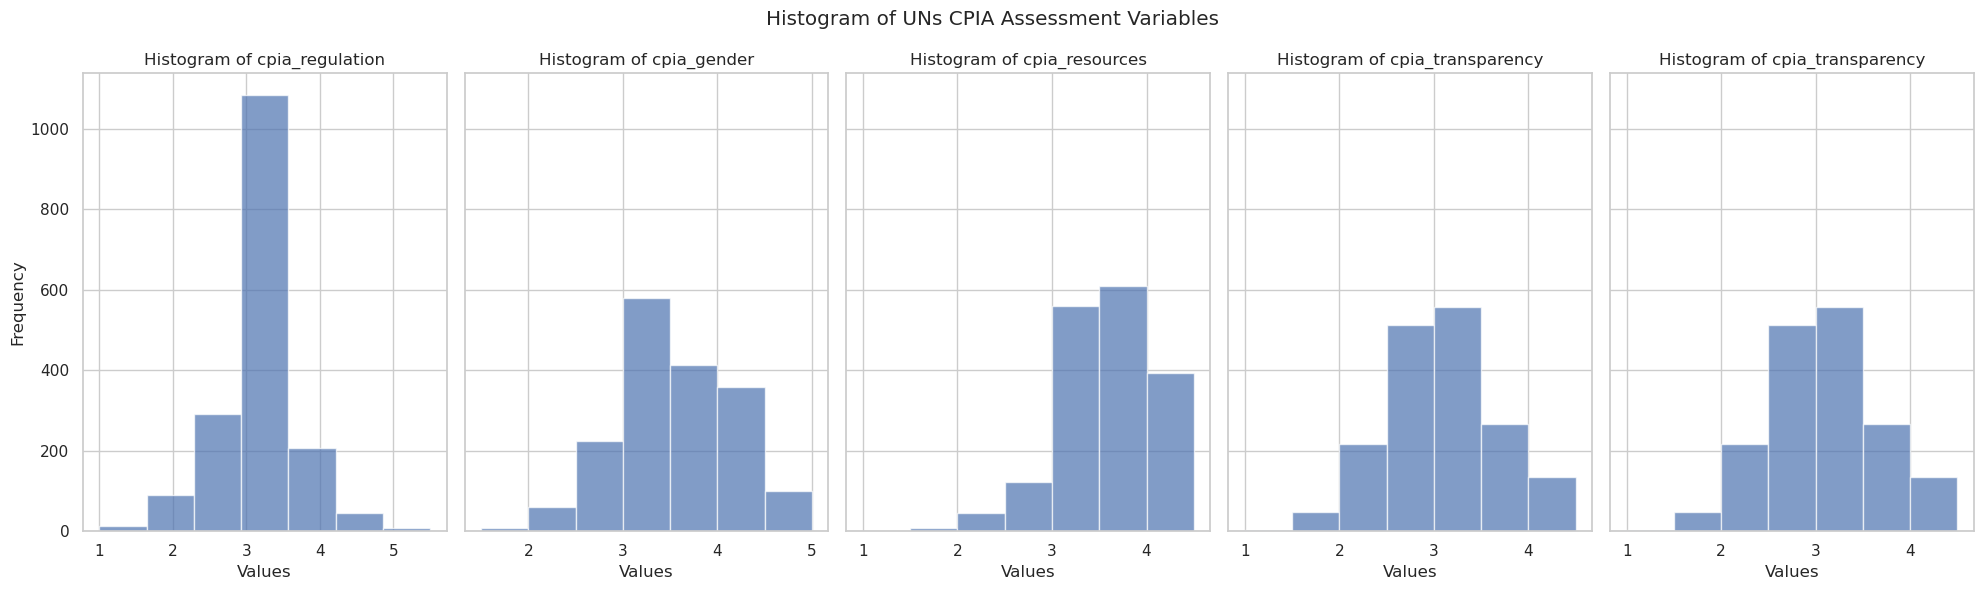

In [42]:
###### create a figure and axis objects
cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_transparency']

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Histogram of UNs CPIA Assessment Variables')

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

#### 2.2c Graphical Review of Feature Variables (Healthcare and Education)

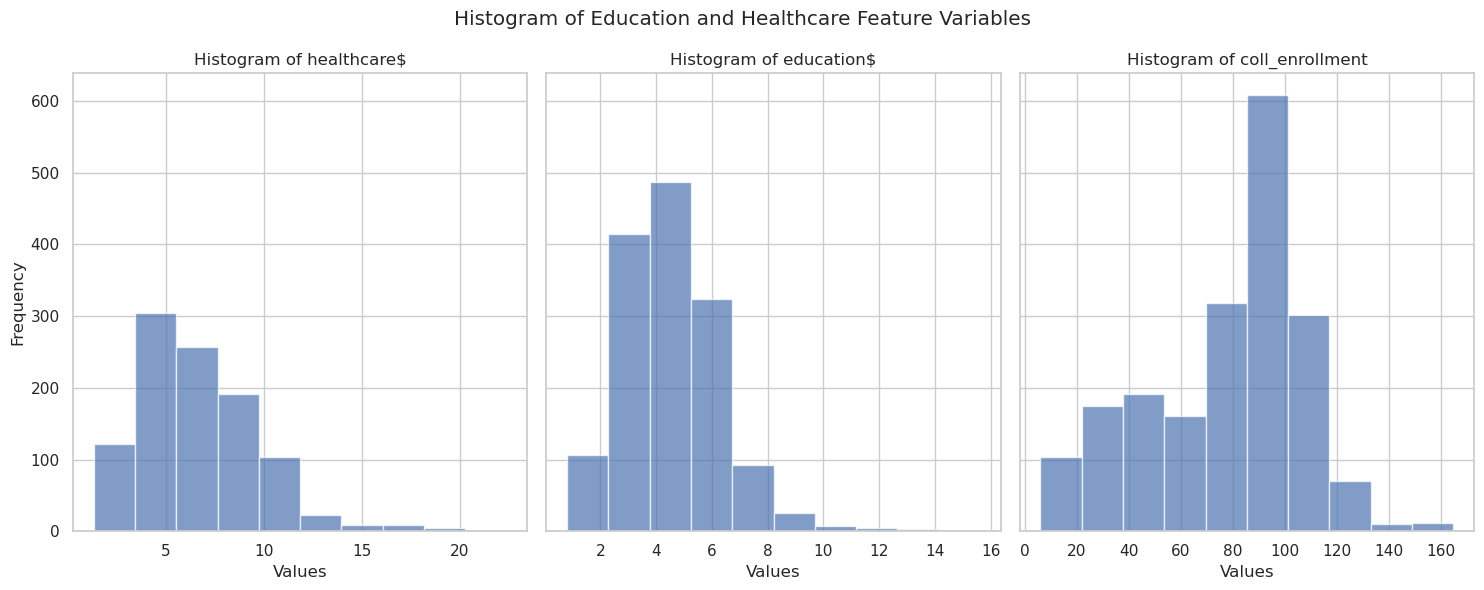

In [43]:
# create a column of variables you want to graph
cols = ['healthcare$', 'education$', 'coll_enrollment']

###### create a figure and axis objects
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=10, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Histogram of Education and Healthcare Feature Variables')

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

#### 2.2d Graphical Review of Feature Variables (Income Distribution)

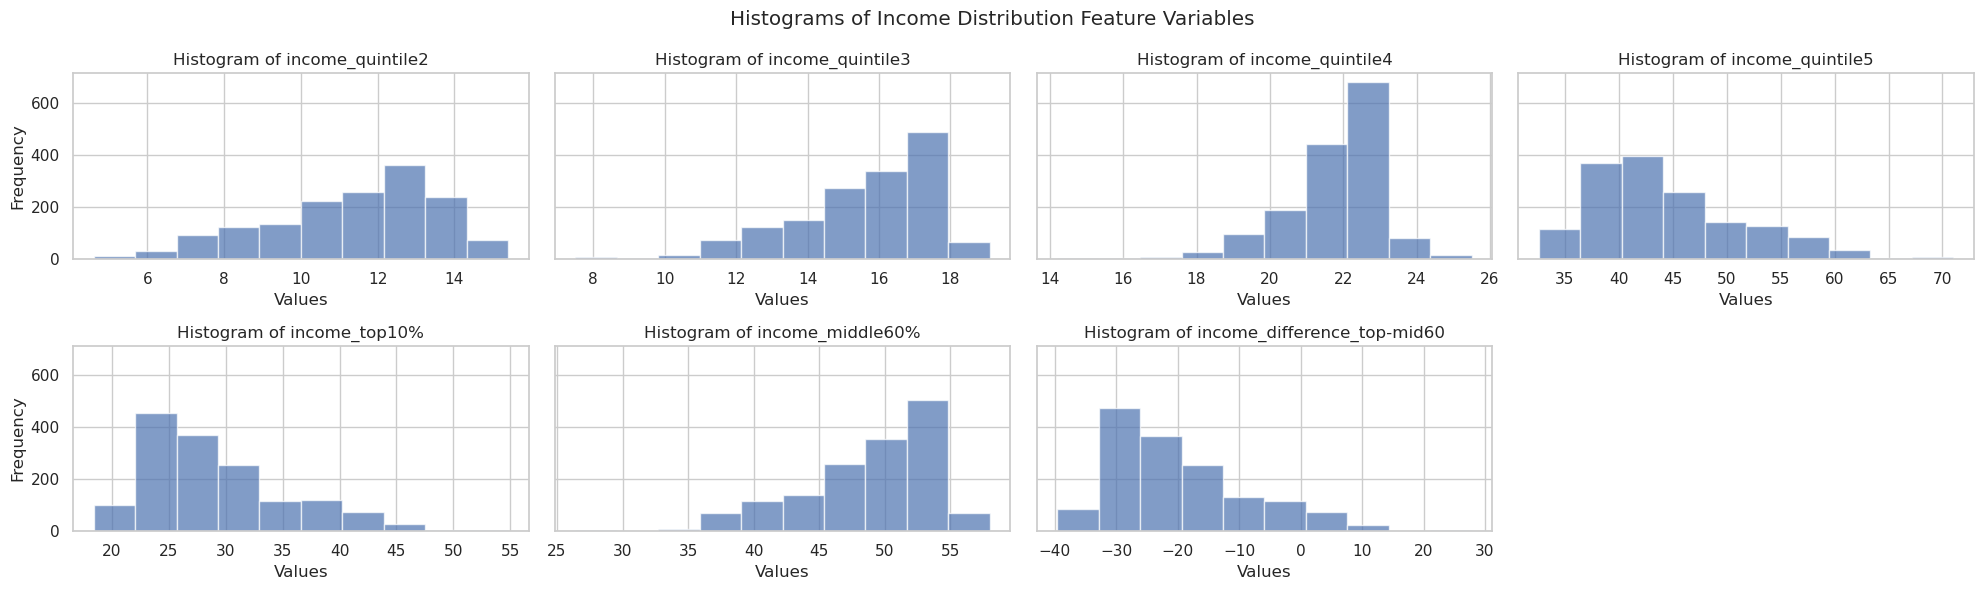

In [47]:
# create a column of variables you want to graph
cols = ['income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60']

###### create a figure and axis objects
fig, axes = plt.subplots(2, 4, figsize=(20, 6), sharey=True)

####### Flatten the axes array for easy iteration
axes = axes.flatten()

######## plot the histogram for each columns
for i, col in enumerate(cols):
    if i < len(axes):
        axes[i].hist(df_economy2[col], bins=10, alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        if i % 4 == 0:  ##### Only set ylabel for the first histogram in each row
            axes[i].set_ylabel('Frequency')
            
####### hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

########## Add a main title
fig.suptitle('Histograms of Income Distribution Feature Variables')

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

#### 2.2d Graphical Review of Feature Variables (Import and Export Value)

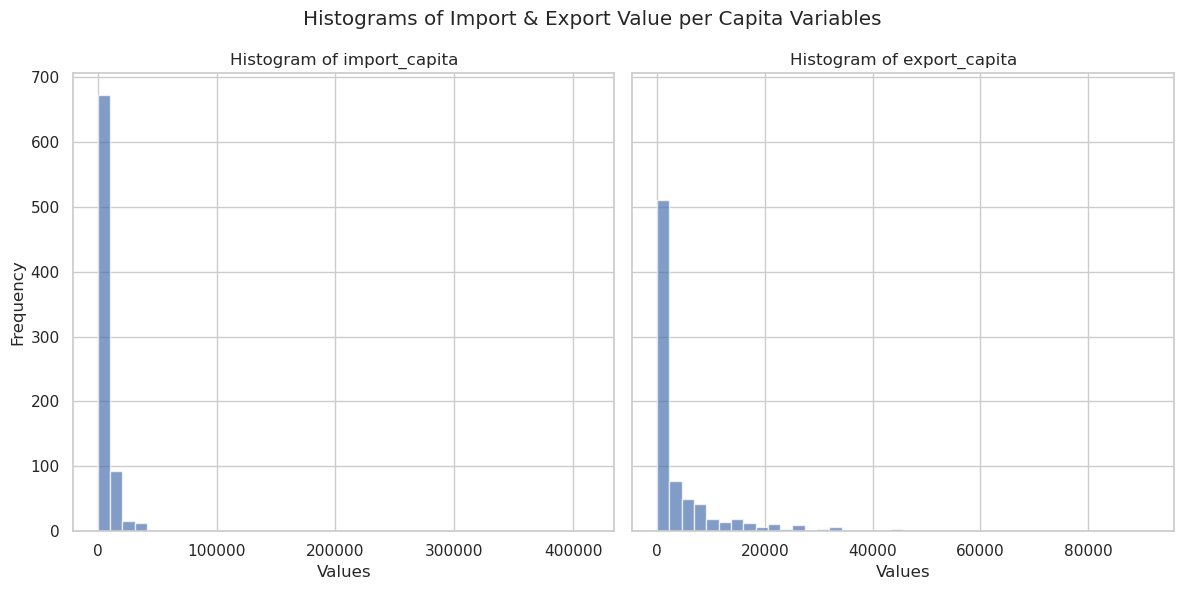

In [50]:
# create a column of variables you want to graph
cols = ['import_capita', 'export_capita']

###### create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=40, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Histograms of Import & Export Value per Capita Variables')

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

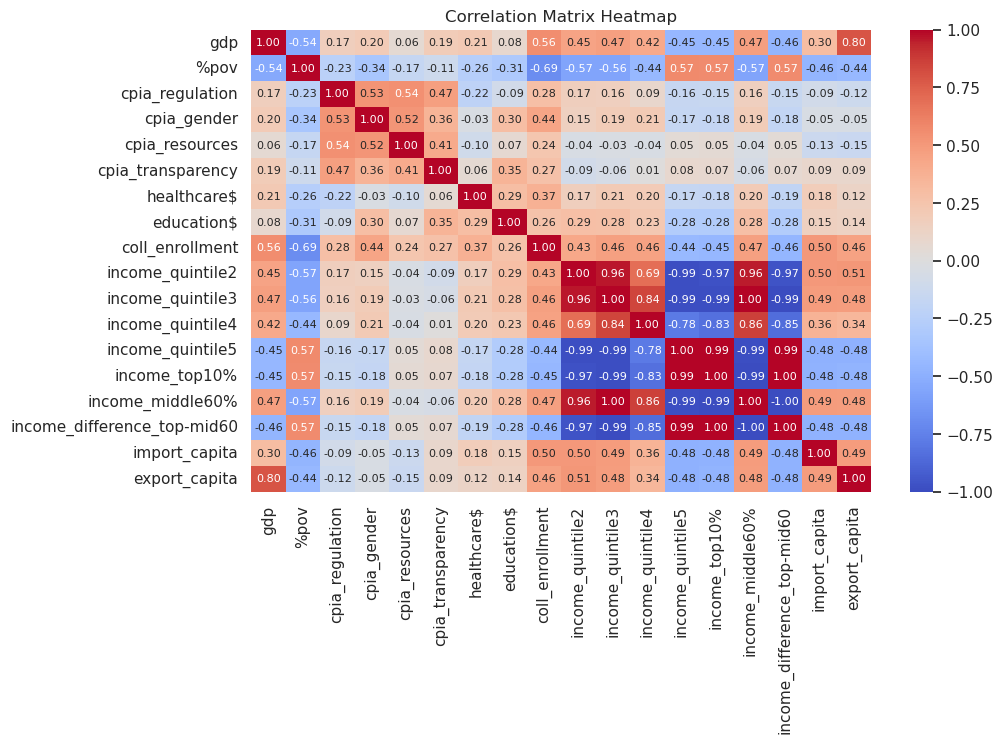

In [54]:

########## create a list of the variables to analyze
cols = ['gdp','%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment',
       'income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60', 'import_capita', 'export_capita']

###### create a correlation matrix of econ variables
correlation_matrix_econ = df_economy2[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_econ, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 8})
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Data Preparation
- Cleaning
- Transformation
- Feature engineering

# 4. Model
- Model Selection
- Training and testing
- Evaluation

# 5. Results
- Insights
- Reccomendations

# 6. Conclusion
- Recap
- Next Steps

# Appendix
- additional information visualizations, etc